# Modelo de dos pilotes: cimentación sobre un deposito de suelo estratificado
 
A continuación se importan las librerías que se utilizan en este notebook

In [4]:
# Esta línea asegura que los gráficos que crees se muestren en el cuaderno sin necesidad de llamar a plt.show() cada vez.
%matplotlib inline

# Importando las bibliotecas necesarias
# NumPy es una biblioteca para el lenguaje de programación Python, que añade soporte para grandes matrices y arreglos multidimensionales, 
# junto con una gran colección de funciones matemáticas de alto nivel para operar en estos arreglos.
import numpy as np

# Matplotlib es una biblioteca de gráficos para el lenguaje de programación Python y su extensión de matemáticas numéricas NumPy. 
# Proporciona una API orientada a objetos para incrustar gráficos en aplicaciones usando kits de herramientas GUI de propósito general como Tkinter, wxPython, Qt, o GTK.
import matplotlib.pyplot as plt

# solidspy.postprocesor es un módulo de la biblioteca SolidSpy, que es un análisis de elementos finitos simple en Python.
# Este módulo contiene rutinas para el post-procesamiento de los resultados.
import solidspy.postprocesor as pos

# aux_functions es un módulo definido por el usuario. Parece contener rutinas externas creadas para la automatización de tareas.
import aux_functions as aux

# pandas es una biblioteca de software escrita para el lenguaje de programación Python para la manipulación y análisis de datos. 
# En particular, ofrece estructuras de datos y operaciones para manipular tablas numéricas y series de tiempo.
import pandas as pd


import warnings
warnings.filterwarnings('ignore')

Aquí está el código de la función modelos que selecciona el modelo a utilizar basándose en el parámetro id_model y devuelve los parámetros correspondientes:

In [5]:
def modelos(P1, P2, V1, V2, id_model):
    """
    Esta función selecciona el modelo a utilizar basándose en el parámetro id_model y devuelve los parámetros correspondientes.
    
    Parámetros:
    P1, P2, V1, V2: Parámetros de carga
    id_model: Identificador del modelo a utilizar (0 para zapata, 1 para 1 pilote, cualquier otro valor para 2 pilotes)
    
    Devuelve:
    nodes, mats, elements, loads, UG, UC, S_nodes, E_nodes, eles: Parámetros correspondientes al modelo seleccionado
    """
       
    # Selección del modelo
    if id_model == 0:  # Condición para el modelo zapata
        nodes, mats, elements, loads, UG, UC, S_nodes, E_nodes, eles = aux.zapata(P1, P2, V1, V2)
    elif id_model == 1:  # Condición para el modelo 1 pilote
        nodes, mats, elements, loads, UG, UC, S_nodes, E_nodes, eles = aux.pilote_1(P1, P2, V1, V2)
    else:  # Condición para el modelo 2 pilotes
        nodes, mats, elements, loads, UG, UC, S_nodes, E_nodes, eles = aux.pilote_2(P1, P2, V1, V2)
    
    # Devuelve los parámetros
    return nodes, mats, elements, loads, UG, UC, S_nodes, E_nodes, eles

En la siguiente celda se propone el modelo 0, correspondiente a una zapata.

In [6]:
# Elige el modelo (0: Zapata, 1: 1 pilote, 2: 2 pilotes)
id_model = 2

Se propone la máxima combinación de cargas P-M-V encontrada que pueda ser equilibrada por el suelo de acuerdo a las dos tablas presentadas arriba (resistencia a la compresión y resistencia al corte). Luego se calcula la magnitud del vector resultante.

In [153]:
# Define las cargas en tf (tonelada-fuerza) y tf*m (tonelada-fuerza metro)
P = 1.4  # tf
V = 0.0  # tf
M = 0.0  # tf*m

# Calcula la magnitud del vector
magnitud = np.sqrt(P**2 + M**2 + V**2)

# Imprime el resultado
print("La magnitud del vector es:", magnitud, "tf")

La magnitud del vector es: 1.4 tf


Este código calcula e imprime las cargas resultantes en cada punto de aplicación en toneladas-fuerza (tf).

In [154]:
# Calcula las cargas resultantes en cada punto de aplicación en tf
P1 = -2 * M + P / 2 # tf
P2 = 2 * M + P / 2 # tf
V1 = V / 2 # tf
V2 = V / 2 # tf

# Imprime las cargas resultantes
print(f"P1 = {P1} tf")
print(f"P2 = {P2} tf")
print(f"V1 = {V1} tf")
print(f"V2 = {V2} tf")

P1 = 0.7 tf
P2 = 0.7 tf
V1 = 0.0 tf
V2 = 0.0 tf


Se ejecuta el modelo y obtienen los parámetros

In [155]:
nodes, mats, elements, loads, UG, UC, S_nodes, E_nodes, eles = modelos(P1, P2, V1, V2, id_model)

A continuación, para la combinación propuesta, se grafica la configuración deformada de la cimentación.

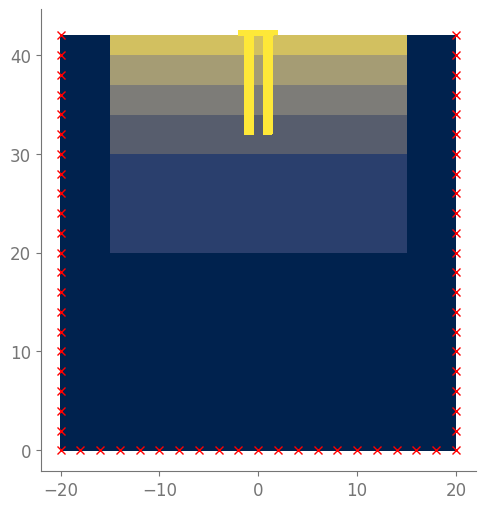

In [156]:
aux.deformacionFill(nodes , elements , UC , factor = 1.0 , cmap='cividis')

A continuación se calculan las tensiones principales y cortantes máximos que serán comparadas con los valores de resistencia a compresión y corte.

In [157]:
sig_1, sig_2, dir_1, dir_2 = pos.principal_dirs(S_nodes)
TAO = (np.abs(sig_1 - sig_2))/2

Incialmente se visualiza  la tensión principal máxima en el estrato 1 y la zapata.

(36.0, 45.0)

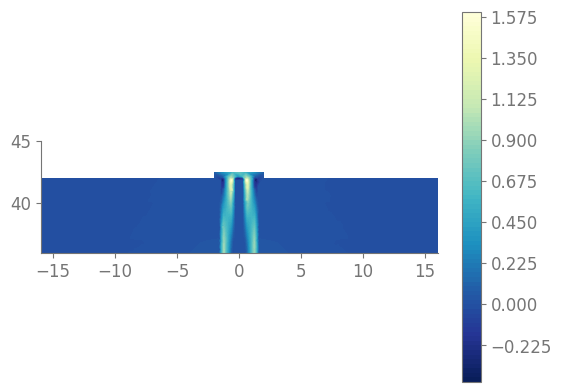

In [158]:
els = np.vstack((
    eles[1],  # Semi-espacio
    eles[2],  # Estrato 5
    eles[3],  # Estrato 4
    eles[4],  # Estrato 3
    eles[5],  # Estrato 2
    eles[6],  # Estrato 1
    eles[7],  # Semi-espacio
))
pos.plot_node_field(sig_1, nodes, els, plt_type="contourf", levels=100)
plt.xlim([-16,16])
plt.ylim([36,45]) 

Se resaltan las zonas que superan el valor de referencia (resistencia a la compresión del primer estrato) color  púrpura oscuro. Se verifica que la combinación elegida no supera el valor de referencia en el estrato 1.

(36.0, 45.0)

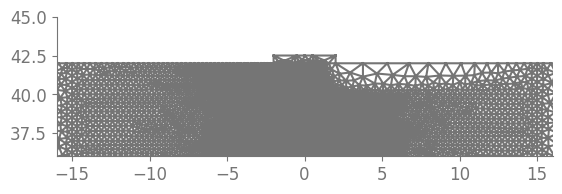

In [160]:
els = np.vstack((
    eles[1],  # Semi-espacio
    eles[2],  # Estrato 5
    eles[3],  # Estrato 4
    eles[4],  # Estrato 3
    eles[5],  # Estrato 2
    eles[6],  # Estrato 1
    eles[7],  # Semi-espacio
)) 
ref_val= 9.58
aux.filtered(nodes,els , sig_1, ref_val)
plt.xlim([-16,16])
plt.ylim([36,45])  

De igual forma se verifica que los valores obtenidos para las cargas elegidas no superan los valores de referencia de los demas estratos que son mayores al del estrato 1. 

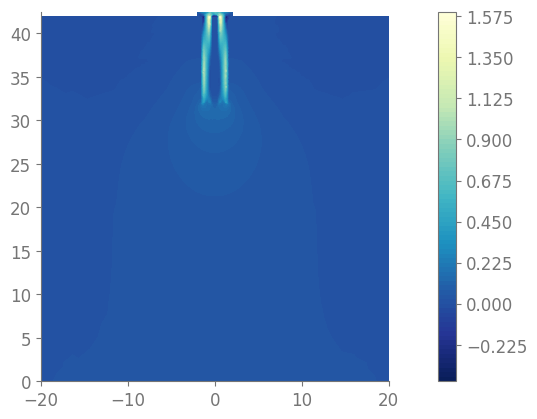

In [161]:
pos.plot_node_field(sig_1, nodes, els, plt_type="contourf", levels=100)

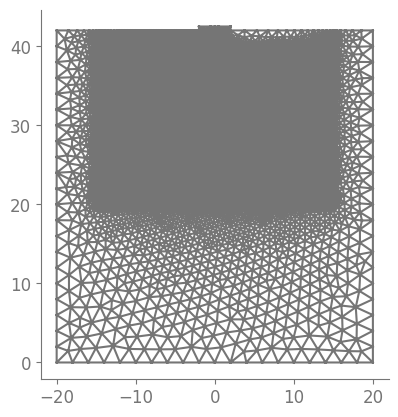

In [162]:
aux.filtered(nodes,els , sig_1, ref_val)


También se visualiza la tensión cortante máxima en el estrato 1 y en la zapata.

(36.0, 45.0)

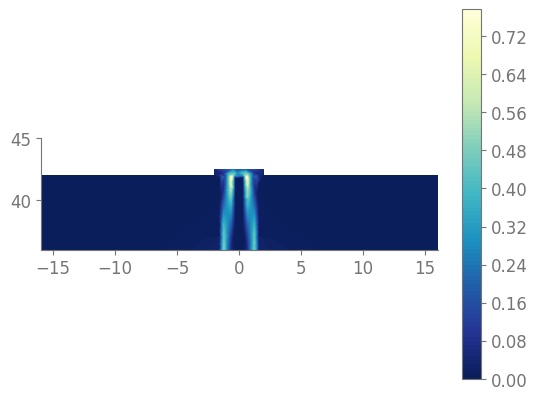

In [164]:
pos.plot_node_field(TAO, nodes, els, plt_type="contourf", levels=100)
plt.xlim([-16,16])
plt.ylim([36,45]) 

Se resaltan las zonas que superan el valor de referencia (resistencia a la tensión cortante del primer estrato) color  púrpura oscuro. Se verifica que la combinación elegida no supera el valor de referencia en el estrato 1.

(36.0, 45.0)

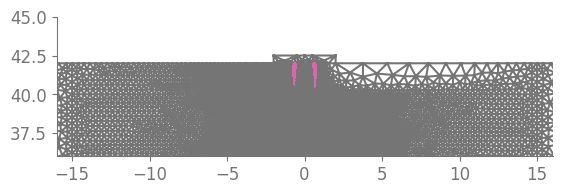

In [165]:
ref_val= 0.5
aux.filtered(nodes,els , TAO, ref_val)
plt.xlim([-16,16])
plt.ylim([36,45]) 

y se verefica de igual forma para los demas estratos.

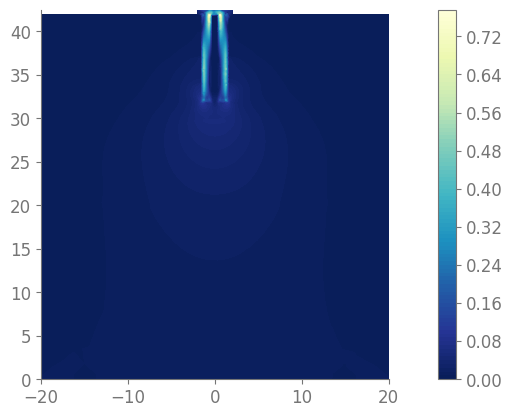

In [166]:
 
pos.plot_node_field(TAO, nodes, els, plt_type="contourf", levels=100)

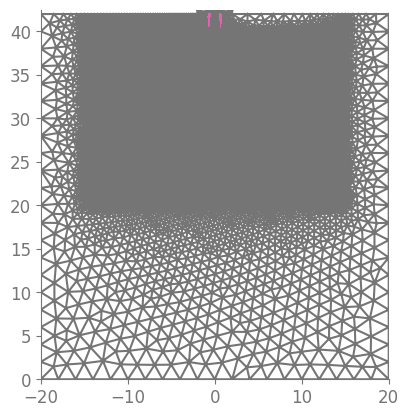

In [167]:
aux.filtered(nodes,els , TAO, ref_val)

Ahora se dibuja el diagrama de cuerpo libre de la cimentación.

![Diagrama de cuerpo libre](img/diagrama_modelo_2.png)

Ahora se repite el procedimiento con valores que producen la falla del deposito de suelo al romper el equilibrio del sistema. Se observa como el color purpura alcanza la zona del estrato 1.

La magnitud del vector es: 14.0 tf
P1 = 7.0 tf
P2 = 7.0 tf
V1 = 0.0 tf
V2 = 0.0 tf


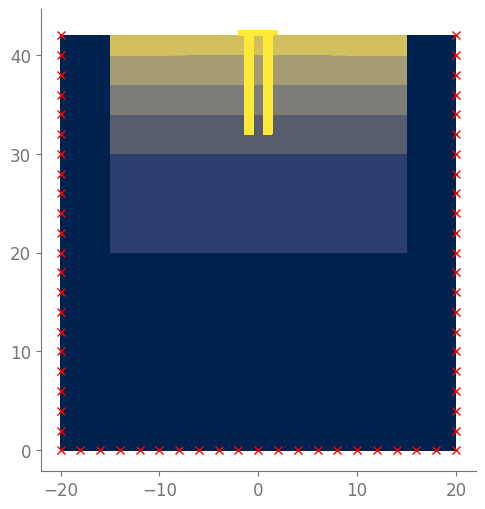

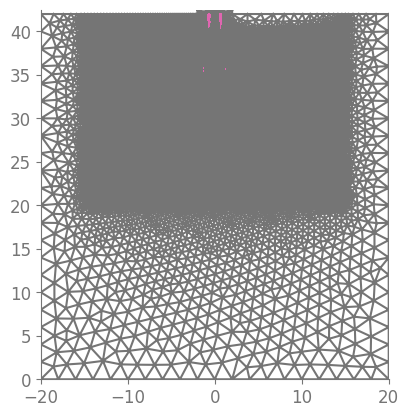

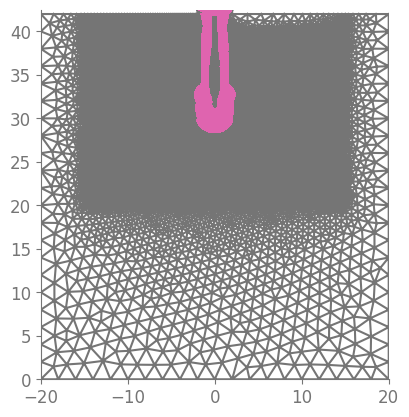

In [169]:
#factor de reescalamiento de las cargas
f_0 = 10

# Define las cargas en tf (tonelada-fuerza) y tf*m (tonelada-fuerza metro)
P = f_0*1.4  # tf
V = f_0*0.0  # tf
M = f_0*0.0  # tf*m

# Calcula la magnitud del vector
magnitud = np.sqrt(P**2 + M**2 + V**2)

# Imprime el resultado
print("La magnitud del vector es:", magnitud, "tf")


# Calcula las cargas resultantes en cada punto de aplicación en tf
P1 = -2 * M + P / 2 # tf
P2 = 2 * M + P / 2 # tf
V1 = V / 2 # tf
V2 = V / 2 # tf

# Imprime las cargas resultantes
print(f"P1 = {P1} tf")
print(f"P2 = {P2} tf")
print(f"V1 = {V1} tf")
print(f"V2 = {V2} tf")


nodes, mats, elements, loads, UG, UC, S_nodes, E_nodes, eles = modelos(P1, P2, V1, V2, id_model)

 
sig_1, sig_2, dir_1, dir_2 = pos.principal_dirs(S_nodes)
TAO = (np.abs(sig_1 - sig_2))/2

# Apila verticalmente los elementos de diferentes capas usando la función vstack de numpy
# Cada elemento corresponde a una capa diferente de la estructura del suelo
 

aux.deformacionFill(nodes , elements , UC , factor = 1.0 , cmap='cividis')
ref_val=9.58
aux.filtered(nodes,els , sig_1, ref_val)
ref_val=0.50
aux.filtered(nodes,els , TAO, ref_val)